In [2]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np

from pathlib import Path

#from tqdm import tqdm_notebook as tqdm
import pandas as pd
import numpy as np
import glob
import scipy.io
import cv2

import random
import sys
import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline



In [3]:
input_path = "C:/Users/Aaron Shi/dev/python/bluestamp/utk_data_2.mat"
temp = scipy.io.loadmat(input_path)
#print(temp)
images = temp['images']
ages = temp['ages']
genders = temp['genders']
races = temp['races']
image_size = temp['img_size']


In [4]:
#(StartAgeRange, EndAgeRange, Label)
#infant, toddler, grade-schooler, adolescent, young-adult, adult, middle-aged, aged, elderly
#age_ranges=[(0,1,0), (2,5,1),(6,12,2),(13,18,3),(19,26,4), (27,45,5), (46, 64,6), (65, 79,7), (80, 120,8)]

age_classes = ["infant", "toddler", "grade-schooler", "adolescent", "young-adult", "adult", "middle-aged", "aged", "elderly"]

In [5]:
import random

array([[8, 8, 8, ..., 2, 2, 2]])

array([[8, 8, 8, ..., 2, 2, 2]])

In [ ]:
27000/4

In [6]:

X_data = images
y_data_g = to_categorical(genders, 2)
y_data_a = to_categorical(ages, 9)
y_data_r = to_categorical(races, 5)

In [7]:
X_data = np.array(X_data)
#X_data = X_data.reshape(X_data.shape[0], (64, 64,3))
X_data = X_data.astype("float32")
X_data /= 255

In [8]:
a = random.sample(range(int(len(X_data))),(int(len(X_data)*0.75)))
print(len(X_data)-len(a))

5927


In [9]:
def split_data(data):
    data_train = []
    data_test = []
    for i, val in enumerate(data):
        if i in a:
            data_train.append(val)
        else:
            data_test.append(val)
    return data_train, data_test

X_train, X_test = split_data(X_data)

In [10]:
X_train, X_test = split_data(X_data)
g_train, g_test = split_data(y_data_g[0])
a_train, a_test = split_data(y_data_a[0])
r_train, r_test = split_data(y_data_r[0])

In [11]:
X_train = np.array(X_train)
a_train = np.array(a_train)
g_train = np.array(g_train)
r_train = np.array(r_train)
X_test = np.array(X_test)
a_test = np.array(a_test)
g_test = np.array(g_test)
r_test = np.array(r_test)

In [83]:
a_train.shape

(11853, 9)

(11853, 9)

In [12]:
X_train = X_train.reshape((17780, 64, 64, 1))
#a_train = a_train.reshape((17780, 64, 64, 1))
#g_train = g_train.reshape((1, 64, 64, 1))
#r_train = r_train.reshape((11853, 64, 64, 1))
X_test = X_test.reshape((5927, 64, 64, 1))
#a_test = a_test.reshape((11854, 64, 64, 1))
#g_test = g_test.reshape((11854, 64, 64, 1))
#r_test = r_test.reshape((11854, 64, 64, 1))


In [45]:
X_testing.shape

(6750, 64, 64, 3)

(6750, 64, 64, 3)

In [ ]:
g_train

In [92]:
r_train

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [53]:
'''
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers


modelN = models.Sequential()
modelN.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                        input_shape=(64, 64, 1)))
modelN.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
#modelN.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
modelN.add(layers.MaxPooling2D(pool_size=(2, 2)))

modelN.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
#modelN.add(layers.Conv2D(, (3, 3), padding='same', activation='relu'))
modelN.add(layers.MaxPooling2D(pool_size=(2, 2)))

modelN.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
#modelN.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelN.add(layers.MaxPooling2D(pool_size=(2, 2)))

#modelN.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
#modelN.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
#modelN.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
#modelN.add(layers.MaxPooling2D(pool_size=(2, 2)))


modelN.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
#modelN.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelN.add(layers.MaxPooling2D(pool_size=(2, 2)))

modelN.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
#modelN.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelN.add(layers.MaxPooling2D(pool_size=(2, 2)))
'''

In [78]:
'''
modelN.add(layers.Flatten())  # this converts our 3D feature maps to 1D feature vectors
modelN.add(layers.Dense(64, activation='relu'))
modelN.add(layers.Dense(64, activation='relu'))
modelN.add(layers.Dense(9, activation='softmax'))

# optimizer:
modelN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print ('Training....')


#fit
nb_epoch = 20
batch_size = 128



modelF = modelN.fit(X_train, a_train, epochs=nb_epoch, batch_size=batch_size, validation_data=(X_test, a_test), shuffle=True, verbose=1)'''

Training....
Training....
Train on 11853 samples, validate on 11854 samplesTrain on 11853 samples, validate on 11854 samples

Epoch 1/20
Epoch 1/20


 - ETA: 3:53 - loss: 2.0176 - acc: 0.3464..]  128/11853 [..............................] - ETA: 8:04 - loss: 2.1878 - acc: 0.3672 - ETA: 8:04 - loss: 2.1878 - acc: 0.367  256/11853 [..............................]  256/11853 [..............................] - ETA: 7:28 - loss: 2.1852 - acc: 0.351  384/11853 [..............................]  384/11853 [..............................] - ETA: 9:42 - loss: 2.1799 - acc: 0.380  512/11853 [>.............................] - ETA: 8:58 - loss: 2.1776 - acc: 0.3770 - ETA: 8:58 - loss: 2.1776 - acc: 0.37  640/11853 [>.............................]  640/11853 [>.............................] - ETA: 8:24 - loss: 2.1757 - acc: 0.3750 - ETA: 8:24 - loss: 2.1757 - acc: 0.375  768/11853 [>.............................] - ETA: 8:38 - loss: 2.1742 - acc: 0.3659 - ETA: 8:38 - loss: 2.1742 - acc: 0.365  896/11853 [=>............................]  896/11853 [=>............................] - ETA: 8:18 - loss: 2.1715 - acc: 0.367 1024/11853 [=>..............

 - ETA: 3:46 - loss: 1.8155 - acc: 0.3554..]  128/11853 [..............................] - ETA: 15:33 - loss: 1.6968 - acc: 0.4453 - ETA: 15:33 - loss: 1.6968 - acc: 0.  256/11853 [..............................]  256/11853 [..............................] - ETA: 11:33 - loss: 1.7495 - acc: 0.4062 - ETA: 11:33 - loss: 1.7495 - acc: 0.4  384/11853 [..............................]  384/11853 [..............................] - ETA: 12:27 - loss: 1.7801 - acc: 0.  512/11853 [>.............................]  512/11853 [>.............................] - ETA: 11:54 - loss: 1.7635 - acc: 0.4043 - ETA: 11:54 - loss: 1.7635 - acc: 0. - ETA: 11:26 - loss: 1.7773 - acc: 0.3875 - ETA: 11:26 - loss: 1.7773 - acc: 0.38 - ETA: 11:12 - loss: 1.7893 - acc: 0.37 - ETA: 11:12 - loss: 1.7893 - acc: 0.3  896/11853 [=>............................]  896/11853 [=>............................] - ETA: 11:01 - loss: 1.7913 - acc: 0.3 1024/11853 [=>............................] 1024/11853 [=>......................

 - 643s 54ms/sample - loss: 1.8286 - acc: 0.3499 - val_loss: 1.8315 - val_acc: 0.3471..] - ETA: 3:31 - loss: 1.8179 - acc: 0.3538 - ETA: 3:31 - loss: 1.8179 - acc: 0.353 7680/11853 [==================>...........] 7680/11853 [==================>...........] - ETA: 3:25 - loss: 1.8171 - acc: 0.354 7808/11853 [==================>...........] - ETA: 3:18 - loss: 1.8181 - acc: 0.3550 - ETA: 3:18 - loss: 1.8181 - acc: 0.35 7936/11853 [===================>..........] - ETA: 3:10 - loss: 1.8167 - acc: 0.3560 7936/11853 [===================>..........] - ETA: 3:10 - loss: 1.8167 - acc: 0.356 8064/11853 [===================>..........] - ETA: 3:04 - loss: 1.8154 - acc: 0.3566 - ETA: 3:04 - loss: 1.8154 - acc: 0.356 8192/11853 [===================>..........] 8192/11853 [===================>..........] - ETA: 2:57 - loss: 1.8152 - acc: 0.357 8320/11853 [====================>.........] 8320/11853 [====================>.........] - ETA: 2:50 - loss: 1.8146 - acc: 0.357 8448/11853 [================

11853/11853 [==============================]Epoch 4/20 - 569s 48ms/sample - loss: 1.8292 - acc: 0.3499 - val_loss: 1.8303 - val_acc: 0.3471

Epoch 4/20


 - ETA: 2:44 - loss: 1.8384 - acc: 0.3468..]  128/11853 [..............................] - ETA: 6:41 - loss: 1.7927 - acc: 0.398  256/11853 [..............................]  256/11853 [..............................] - ETA: 6:52 - loss: 1.8016 - acc: 0.398  384/11853 [..............................]  384/11853 [..............................] - ETA: 7:04 - loss: 1.8191 - acc: 0.380  512/11853 [>.............................]  512/11853 [>.............................] - ETA: 7:00 - loss: 1.8305 - acc: 0.359  640/11853 [>.............................]  640/11853 [>.............................] - ETA: 6:49 - loss: 1.8082 - acc: 0.367  768/11853 [>.............................]  768/11853 [>.............................] - ETA: 6:52 - loss: 1.8168 - acc: 0.362  896/11853 [=>............................]  896/11853 [=>............................] - ETA: 6:52 - loss: 1.8417 - acc: 0.35 1024/11853 [=>............................] 1024/11853 [=>............................] - ETA: 6:44 - lo

 - 555s 47ms/sample - loss: 1.8282 - acc: 0.3499 - val_loss: 1.8315 - val_acc: 0.3471...] - ETA: 2:39 - loss: 1.8370 - acc: 0.346 7808/11853 [==================>...........] 7808/11853 [==================>...........] - ETA: 2:34 - loss: 1.8358 - acc: 0.348 7936/11853 [===================>..........] 7936/11853 [===================>..........] - ETA: 2:29 - loss: 1.8358 - acc: 0.348 8064/11853 [===================>..........] - ETA: 2:24 - loss: 1.8341 - acc: 0.3491 - ETA: 2:24 - loss: 1.8341 - acc: 0.349 8192/11853 [===================>..........] 8192/11853 [===================>..........] - ETA: 2:19 - loss: 1.8333 - acc: 0.34 8320/11853 [====================>.........] 8320/11853 [====================>.........] - ETA: 2:15 - loss: 1.8324 - acc: 0.3489 - ETA: 2:15 - loss: 1.8324 - acc: 0.348 8448/11853 [====================>.........] - ETA: 2:10 - loss: 1.8321 - acc: 0.3496 - ETA: 2:10 - loss: 1.8321 - acc: 0.34 8576/11853 [====================>.........] 8576/11853 [=============

 - ETA: 2:56 - loss: 1.8274 - acc: 0.3492..]  128/11853 [..............................] - ETA: 9:01 - loss: 1.8839 - acc: 0.3594 - ETA: 9:01 - loss: 1.8839 - acc: 0.35  256/11853 [..............................]  256/11853 [..............................] - ETA: 8:00 - loss: 1.8988 - acc: 0.3672 - ETA: 8:00 - loss: 1.8988 - acc: 0.36  384/11853 [..............................]  384/11853 [..............................] - ETA: 7:54 - loss: 1.8745 - acc: 0.3438 - ETA: 7:54 - loss: 1.8745 - acc: 0.343  512/11853 [>.............................] - ETA: 7:57 - loss: 1.8766 - acc: 0.3203 - ETA: 7:57 - loss: 1.8766 - acc: 0.320  640/11853 [>.............................]  640/11853 [>.............................] - ETA: 7:45 - loss: 1.8678 - acc: 0.32  768/11853 [>.............................]  768/11853 [>.............................] - ETA: 7:38 - loss: 1.8573 - acc: 0.3333 - ETA: 7:38 - loss: 1.8573 - acc: 0.33  896/11853 [=>............................]  896/11853 [=>................

 - ETA: 2:55 - loss: 1.8260 - acc: 0.3489..] - ETA: 7:33 - loss: 1.9504 - acc: 0.2734 - ETA: 7:33 - loss: 1.9504 - acc: 0.27  256/11853 [..............................]  256/11853 [..............................] - ETA: 7:09 - loss: 1.8849 - acc: 0.3203 - ETA: 7:09 - loss: 1.8849 - acc: 0.32  384/11853 [..............................]  384/11853 [..............................] - ETA: 7:31 - loss: 1.8849 - acc: 0.3203 - ETA: 7:31 - loss: 1.8849 - acc: 0.32  512/11853 [>.............................]  512/11853 [>.............................] - ETA: 7:34 - loss: 1.8714 - acc: 0.3320 - ETA: 7:34 - loss: 1.8714 - acc: 0.332  640/11853 [>.............................] - ETA: 7:22 - loss: 1.8194 - acc: 0.3609 - ETA: 7:22 - loss: 1.8194 - acc: 0.36  768/11853 [>.............................]  768/11853 [>.............................] - ETA: 7:26 - loss: 1.8206 - acc: 0.3594 - ETA: 7:26 - loss: 1.8206 - acc: 0.359  896/11853 [=>............................] - ETA: 7:23 - loss: 1.8079 - acc:

 - 581s 49ms/sample - loss: 1.8286 - acc: 0.3499 - val_loss: 1.8300 - val_acc: 0.3471 - ETA: 2:50 - loss: 1.8260 - acc: 0.348 7808/11853 [==================>...........] - ETA: 2:45 - loss: 1.8254 - acc: 0.3486 - ETA: 2:45 - loss: 1.8254 - acc: 0.34 7936/11853 [===================>..........] 7936/11853 [===================>..........] - ETA: 2:39 - loss: 1.8242 - acc: 0.3501 - ETA: 2:39 - loss: 1.8242 - acc: 0.350 8064/11853 [===================>..........] 8064/11853 [===================>..........] - ETA: 2:34 - loss: 1.8251 - acc: 0.349 8192/11853 [===================>..........] - ETA: 2:29 - loss: 1.8246 - acc: 0.3497 - ETA: 2:29 - loss: 1.8246 - acc: 0.349 8320/11853 [====================>.........] 8320/11853 [====================>.........] - ETA: 2:24 - loss: 1.8242 - acc: 0.349 8448/11853 [====================>.........] 8448/11853 [====================>.........] - ETA: 2:18 - loss: 1.8240 - acc: 0.35 8576/11853 [====================>.........] 8576/11853 [=================

 - ETA: 2:50 - loss: 1.8315 - acc: 0.3524..]  128/11853 [..............................] - ETA: 6:49 - loss: 1.7518 - acc: 0.421  256/11853 [..............................]  256/11853 [..............................] - ETA: 7:18 - loss: 1.7919 - acc: 0.382  384/11853 [..............................]  384/11853 [..............................] - ETA: 7:23 - loss: 1.7660 - acc: 0.403  512/11853 [>.............................]  512/11853 [>.............................] - ETA: 7:12 - loss: 1.7830 - acc: 0.386  640/11853 [>.............................] - ETA: 7:12 - loss: 1.7813 - acc: 0.3922 - ETA: 7:12 - loss: 1.7813 - acc: 0.392  768/11853 [>.............................]  768/11853 [>.............................] - ETA: 7:11 - loss: 1.7815 - acc: 0.385  896/11853 [=>............................]  896/11853 [=>............................] - ETA: 7:04 - loss: 1.7893 - acc: 0.377 1024/11853 [=>............................] 1024/11853 [=>............................] - ETA: 6:58 - loss

 - ETA: 2:31 - loss: 1.8324 - acc: 0.3495..] - ETA: 7:55 - loss: 1.9051 - acc: 0.3125 - ETA: 7:55 - loss: 1.9051 - acc: 0.31  256/11853 [..............................]  256/11853 [..............................] - ETA: 7:09 - loss: 1.9179 - acc: 0.3008 - ETA: 7:09 - loss: 1.9179 - acc: 0.30  384/11853 [..............................]  384/11853 [..............................] - ETA: 7:11 - loss: 1.8892 - acc: 0.3099 - ETA: 7:11 - loss: 1.8892 - acc: 0.309  512/11853 [>.............................]  512/11853 [>.............................] - ETA: 7:16 - loss: 1.9088 - acc: 0.302  640/11853 [>.............................]  640/11853 [>.............................] - ETA: 7:05 - loss: 1.9164 - acc: 0.301  768/11853 [>.............................]  768/11853 [>.............................] - ETA: 6:58 - loss: 1.9063 - acc: 0.308  896/11853 [=>............................]  896/11853 [=>............................] - ETA: 6:59 - loss: 1.9038 - acc: 0.31 1024/11853 [=>.............

11648/11853 [============================>.] 8064/11853 [===================>..........] - ETA: 2:26 - loss: 1.8310 - acc: 0.3508 - ETA: 2:26 - loss: 1.8310 - acc: 0.350 8192/11853 [===================>..........] 8192/11853 [===================>..........] - ETA: 2:21 - loss: 1.8307 - acc: 0.350 8320/11853 [====================>.........] - ETA: 2:16 - loss: 1.8302 - acc: 0.3502 - ETA: 2:16 - loss: 1.8302 - acc: 0.350 8448/11853 [====================>.........] 8448/11853 [====================>.........] - ETA: 2:11 - loss: 1.8308 - acc: 0.350 8576/11853 [====================>.........] 8576/11853 [====================>.........] - ETA: 2:06 - loss: 1.8319 - acc: 0.34 8704/11853 [=====================>........] 8704/11853 [=====================>........] - ETA: 2:01 - loss: 1.8308 - acc: 0.3497 - ETA: 2:01 - loss: 1.8308 - acc: 0.349 8832/11853 [=====================>........] 8832/11853 [=====================>........] - ETA: 1:56 - loss: 1.8307 - acc: 0.34 8960/11853 [==============

11853/11853 [==============================]Epoch 10/20 - 555s 47ms/sample - loss: 1.8281 - acc: 0.3499 - val_loss: 1.8305 - val_acc: 0.3471

Epoch 10/20


 - ETA: 2:26 - loss: 1.8320 - acc: 0.3480..]  128/11853 [..............................] - ETA: 8:00 - loss: 1.9607 - acc: 0.32  256/11853 [..............................]  256/11853 [..............................] - ETA: 7:23 - loss: 1.8263 - acc: 0.3672 - ETA: 7:23 - loss: 1.8263 - acc: 0.36  384/11853 [..............................] - ETA: 7:26 - loss: 1.8270 - acc: 0.356  512/11853 [>.............................]  512/11853 [>.............................] - ETA: 7:27 - loss: 1.8648 - acc: 0.335  640/11853 [>.............................]  640/11853 [>.............................] - ETA: 7:17 - loss: 1.8750 - acc: 0.331  768/11853 [>.............................]  768/11853 [>.............................] - ETA: 7:10 - loss: 1.8714 - acc: 0.324  896/11853 [=>............................] - ETA: 7:09 - loss: 1.8625 - acc: 0.3281 - ETA: 7:09 - loss: 1.8625 - acc: 0.328 1024/11853 [=>............................] 1024/11853 [=>............................] - ETA: 7:02 - loss: 1.8

 - 558s 47ms/sample - loss: 1.8283 - acc: 0.3499 - val_loss: 1.8301 - val_acc: 0.3471 - ETA: 2:21 - loss: 1.8314 - acc: 0.348 8320/11853 [====================>.........] - ETA: 2:16 - loss: 1.8326 - acc: 0.3480 - ETA: 2:16 - loss: 1.8326 - acc: 0.348 8448/11853 [====================>.........] 8448/11853 [====================>.........] - ETA: 2:11 - loss: 1.8329 - acc: 0.34 - ETA: 2:06 - loss: 1.8341 - acc: 0.3469 - ETA: 2:06 - loss: 1.8341 - acc: 0.34 8704/11853 [=====================>........] 8704/11853 [=====================>........] - ETA: 2:02 - loss: 1.8328 - acc: 0.3475 - ETA: 2:02 - loss: 1.8328 - acc: 0.34 8832/11853 [=====================>........] - ETA: 1:57 - loss: 1.8346 - acc: 0.347 8960/11853 [=====================>........] - ETA: 1:51 - loss: 1.8345 - acc: 0.3479 - ETA: 1:51 - loss: 1.8345 - acc: 0.347 9088/11853 [======================>.......] 9088/11853 [======================>.......] - ETA: 1:47 - loss: 1.8352 - acc: 0.34 9216/11853 [======================>...

 - ETA: 2:20 - loss: 1.8329 - acc: 0.3473..]  128/11853 [..............................] - ETA: 7:51 - loss: 1.7975 - acc: 0.3438 - ETA: 7:51 - loss: 1.7975 - acc: 0.343  256/11853 [..............................]  256/11853 [..............................] - ETA: 7:09 - loss: 1.7865 - acc: 0.36 - ETA: 7:07 - loss: 1.7827 - acc: 0.3620 - ETA: 7:07 - loss: 1.7827 - acc: 0.362  512/11853 [>.............................]  512/11853 [>.............................] - ETA: 7:18 - loss: 1.7797 - acc: 0.361  640/11853 [>.............................]  640/11853 [>.............................] - ETA: 7:11 - loss: 1.7860 - acc: 0.362  768/11853 [>.............................] - ETA: 6:59 - loss: 1.7690 - acc: 0.3633 - ETA: 6:59 - loss: 1.7690 - acc: 0.363  896/11853 [=>............................]  896/11853 [=>............................] - ETA: 6:58 - loss: 1.7793 - acc: 0.35 1024/11853 [=>............................] 1024/11853 [=>............................] - ETA: 6:55 - loss: 1.7706

 - ETA: 2:17 - loss: 1.8281 - acc: 0.3495..]  128/11853 [..............................] - ETA: 6:38 - loss: 1.9498 - acc: 0.296  256/11853 [..............................] - ETA: 7:07 - loss: 1.9032 - acc: 0.3047 - ETA: 7:07 - loss: 1.9032 - acc: 0.304  384/11853 [..............................]  384/11853 [..............................] - ETA: 7:14 - loss: 1.8961 - acc: 0.322  512/11853 [>.............................]  512/11853 [>.............................] - ETA: 7:06 - loss: 1.9128 - acc: 0.326  640/11853 [>.............................]  640/11853 [>.............................] - ETA: 7:02 - loss: 1.9168 - acc: 0.323  768/11853 [>.............................]  768/11853 [>.............................] - ETA: 7:02 - loss: 1.9113 - acc: 0.324  896/11853 [=>............................]  896/11853 [=>............................] - ETA: 6:55 - loss: 1.9019 - acc: 0.32 1024/11853 [=>............................] - ETA: 6:46 - loss: 1.9068 - acc: 0.322 1152/11853 [=>.........

11776/11853 [============================>.]/11853 [====================>.........] 8448/11853 [====================>.........] - ETA: 2:12 - loss: 1.8273 - acc: 0.3498 - ETA: 2:12 - loss: 1.8273 - acc: 0.349 8576/11853 [====================>.........] - ETA: 2:07 - loss: 1.8264 - acc: 0.3502 - ETA: 2:07 - loss: 1.8264 - acc: 0.350 8704/11853 [=====================>........] 8704/11853 [=====================>........] - ETA: 2:02 - loss: 1.8267 - acc: 0.35 8832/11853 [=====================>........] - ETA: 1:57 - loss: 1.8261 - acc: 0.350 8960/11853 [=====================>........] 8960/11853 [=====================>........] - ETA: 1:52 - loss: 1.8267 - acc: 0.349 9088/11853 [======================>.......] 9088/11853 [======================>.......] - ETA: 1:47 - loss: 1.8284 - acc: 0.349 - ETA: 1:42 - loss: 1.8284 - acc: 0.3498 9216/11853 [======================>.......] - ETA: 1:42 - loss: 1.8284 - acc: 0.34 9344/11853 [======================>.......] 9344/11853 [===================

 - ETA: 2:35 - loss: 1.8373 - acc: 0.3464..] - ETA: 6:25 - loss: 1.7417 - acc: 0.4062 - ETA: 6:25 - loss: 1.7417 - acc: 0.40  256/11853 [..............................]  256/11853 [..............................] - ETA: 7:01 - loss: 1.7169 - acc: 0.3984 - ETA: 7:01 - loss: 1.7169 - acc: 0.398  384/11853 [..............................] - ETA: 7:15 - loss: 1.7656 - acc: 0.3750 - ETA: 7:15 - loss: 1.7656 - acc: 0.375  512/11853 [>.............................]  512/11853 [>.............................] - ETA: 7:08 - loss: 1.7474 - acc: 0.390  640/11853 [>.............................]  640/11853 [>.............................] - ETA: 6:57 - loss: 1.7817 - acc: 0.378  768/11853 [>.............................]  768/11853 [>.............................] - ETA: 7:11 - loss: 1.7883 - acc: 0.375  896/11853 [=>............................]  896/11853 [=>............................] - ETA: 7:21 - loss: 1.7795 - acc: 0.37 - ETA: 7:13 - loss: 1.8136 - acc: 0.3525 - ETA: 7:13 - loss: 1.8136 - 

 - ETA: 2:36 - loss: 1.8271 - acc: 0.3505..]  128/11853 [..............................] - ETA: 6:53 - loss: 1.8200 - acc: 0.390  256/11853 [..............................]  256/11853 [..............................] - ETA: 7:06 - loss: 1.7878 - acc: 0.378  384/11853 [..............................]  384/11853 [..............................] - ETA: 7:15 - loss: 1.8107 - acc: 0.341  512/11853 [>.............................] - ETA: 7:08 - loss: 1.8263 - acc: 0.3438 - ETA: 7:08 - loss: 1.8263 - acc: 0.343  640/11853 [>.............................]  640/11853 [>.............................] - ETA: 6:55 - loss: 1.8190 - acc: 0.345  768/11853 [>.............................]  768/11853 [>.............................] - ETA: 6:57 - loss: 1.8116 - acc: 0.347  896/11853 [=>............................]  896/11853 [=>............................] - ETA: 6:56 - loss: 1.7984 - acc: 0.35 - ETA: 6:46 - loss: 1.8036 - acc: 0.3545 - ETA: 6:46 - loss: 1.8036 - acc: 0.354 1152/11853 [=>............

11776/11853 [============================>.]2/11853 [===================>..........] - ETA: 2:21 - loss: 1.8275 - acc: 0.3506 - ETA: 2:21 - loss: 1.8275 - acc: 0.350 8320/11853 [====================>.........] 8320/11853 [====================>.........] - ETA: 2:16 - loss: 1.8270 - acc: 0.350 8448/11853 [====================>.........] - ETA: 2:11 - loss: 1.8289 - acc: 0.3500 - ETA: 2:11 - loss: 1.8289 - acc: 0.350 8576/11853 [====================>.........] 8576/11853 [====================>.........] - ETA: 2:06 - loss: 1.8281 - acc: 0.350 8704/11853 [=====================>........] 8704/11853 [=====================>........] - ETA: 2:01 - loss: 1.8276 - acc: 0.350 8832/11853 [=====================>........] - ETA: 1:56 - loss: 1.8269 - acc: 0.3500 - ETA: 1:56 - loss: 1.8269 - acc: 0.350 8960/11853 [=====================>........] - ETA: 1:51 - loss: 1.8254 - acc: 0.3510 - ETA: 1:51 - loss: 1.8254 - acc: 0.35 9088/11853 [======================>.......] 9088/11853 [====================

11853/11853 [==============================]Epoch 16/20 - 548s 46ms/sample - loss: 1.8286 - acc: 0.3499 - val_loss: 1.8308 - val_acc: 0.3471

Epoch 16/20


 7808/11853 [==================>...........]  128/11853 [..............................] - ETA: 7:43 - loss: 1.7878 - acc: 0.3906 - ETA: 7:43 - loss: 1.7878 - acc: 0.39  256/11853 [..............................]  256/11853 [..............................] - ETA: 7:11 - loss: 1.7808 - acc: 0.3750 - ETA: 7:11 - loss: 1.7808 - acc: 0.375  384/11853 [..............................]  384/11853 [..............................] - ETA: 7:04 - loss: 1.7946 - acc: 0.36 - ETA: 7:14 - loss: 1.7944 - acc: 0.3809 - ETA: 7:14 - loss: 1.7944 - acc: 0.380  640/11853 [>.............................]  640/11853 [>.............................] - ETA: 7:10 - loss: 1.7955 - acc: 0.371  768/11853 [>.............................]  768/11853 [>.............................] - ETA: 6:57 - loss: 1.8275 - acc: 0.36  896/11853 [=>............................]  896/11853 [=>............................] - ETA: 6:58 - loss: 1.8165 - acc: 0.3583 - ETA: 6:58 - loss: 1.8165 - acc: 0.35 1024/11853 [=>.................

 - ETA: 2s - loss: 1.8284 - acc: 0.349872..] 7936/11853 [===================>..........] - ETA: 2:30 - loss: 1.8225 - acc: 0.3482 - ETA: 2:30 - loss: 1.8225 - acc: 0.348 8064/11853 [===================>..........] - ETA: 2:25 - loss: 1.8241 - acc: 0.3477 - ETA: 2:25 - loss: 1.8241 - acc: 0.34 - ETA: 2:20 - loss: 1.8219 - acc: 0.3491 - ETA: 2:20 - loss: 1.8219 - acc: 0.34 8320/11853 [====================>.........] 8320/11853 [====================>.........] - ETA: 2:15 - loss: 1.8221 - acc: 0.3493 - ETA: 2:15 - loss: 1.8221 - acc: 0.349 - ETA: 2:11 - loss: 1.8227 - acc: 0.3490 8448/11853 [====================>.........] - ETA: 2:11 - loss: 1.8227 - acc: 0.34 - ETA: 2:06 - loss: 1.8226 - acc: 0.3495 - ETA: 2:06 - loss: 1.8226 - acc: 0.34 8704/11853 [=====================>........] 8704/11853 [=====================>........] - ETA: 2:01 - loss: 1.8229 - acc: 0.3488 - ETA: 2:01 - loss: 1.8229 - acc: 0.348 8832/11853 [=====================>........] - ETA: 1:56 - loss: 1.8227 - acc: 0.3488

 8064/11853 [===================>..........]  128/11853 [..............................] - ETA: 6:31 - loss: 1.7217 - acc: 0.398  256/11853 [..............................]  256/11853 [..............................] - ETA: 6:53 - loss: 1.8014 - acc: 0.378  384/11853 [..............................] - ETA: 7:13 - loss: 1.8256 - acc: 0.3333 - ETA: 7:13 - loss: 1.8256 - acc: 0.33  512/11853 [>.............................]  512/11853 [>.............................] - ETA: 7:06 - loss: 1.8291 - acc: 0.3398 - ETA: 7:06 - loss: 1.8291 - acc: 0.339  640/11853 [>.............................]  640/11853 [>.............................] - ETA: 6:53 - loss: 1.8352 - acc: 0.345  768/11853 [>.............................]  768/11853 [>.............................] - ETA: 6:56 - loss: 1.8300 - acc: 0.34 - ETA: 6:57 - loss: 1.8358 - acc: 0.3359 - ETA: 6:57 - loss: 1.8358 - acc: 0.335 1024/11853 [=>............................] - ETA: 6:48 - loss: 1.8385 - acc: 0.3340 - ETA: 6:48 - loss: 1.8385 - 

 - ETA: 2:27 - loss: 1.8255 - acc: 0.3509..]  128/11853 [..............................] - ETA: 8:16 - loss: 1.7845 - acc: 0.421  256/11853 [..............................]  256/11853 [..............................] - ETA: 7:46 - loss: 1.8461 - acc: 0.355  384/11853 [..............................]  384/11853 [..............................] - ETA: 7:21 - loss: 1.8825 - acc: 0.341  512/11853 [>.............................]  512/11853 [>.............................] - ETA: 7:26 - loss: 1.8923 - acc: 0.330  640/11853 [>.............................]  640/11853 [>.............................] - ETA: 7:25 - loss: 1.8760 - acc: 0.340  768/11853 [>.............................]  768/11853 [>.............................] - ETA: 7:13 - loss: 1.8678 - acc: 0.33  896/11853 [=>............................]  896/11853 [=>............................] - ETA: 7:10 - loss: 1.8532 - acc: 0.3460 - ETA: 7:10 - loss: 1.8532 - acc: 0.346 1024/11853 [=>............................] 1024/11853 [=>.....

11648/11853 [============================>.] - ETA: 2:22 - loss: 1.8266 - acc: 0.3507 8192/11853 [===================>..........] - ETA: 2:22 - loss: 1.8266 - acc: 0.35 8320/11853 [====================>.........] 8320/11853 [====================>.........] - ETA: 2:17 - loss: 1.8277 - acc: 0.3510 - ETA: 2:17 - loss: 1.8277 - acc: 0.351 8448/11853 [====================>.........] - ETA: 2:12 - loss: 1.8269 - acc: 0.3507 - ETA: 2:12 - loss: 1.8269 - acc: 0.350 8576/11853 [====================>.........] - ETA: 2:07 - loss: 1.8258 - acc: 0.3513 - ETA: 2:07 - loss: 1.8258 - acc: 0.351 8704/11853 [=====================>........] 8704/11853 [=====================>........] - ETA: 2:02 - loss: 1.8278 - acc: 0.350 8832/11853 [=====================>........] 8832/11853 [=====================>........] - ETA: 1:57 - loss: 1.8281 - acc: 0.349 8960/11853 [=====================>........] - ETA: 1:52 - loss: 1.8287 - acc: 0.3489 - ETA: 1:52 - loss: 1.8287 - acc: 0.348 9088/11853 [===================

 - ETA: 2:26 - loss: 1.8260 - acc: 0.3503..]  128/11853 [..............................] - ETA: 6:55 - loss: 1.9343 - acc: 0.2734 - ETA: 6:55 - loss: 1.9343 - acc: 0.273  256/11853 [..............................]  256/11853 [..............................] - ETA: 7:41 - loss: 1.8486 - acc: 0.316  384/11853 [..............................]  384/11853 [..............................] - ETA: 7:32 - loss: 1.8154 - acc: 0.351  512/11853 [>.............................]  512/11853 [>.............................] - ETA: 7:13 - loss: 1.8236 - acc: 0.343  640/11853 [>.............................] - ETA: 7:19 - loss: 1.8204 - acc: 0.3406 - ETA: 7:19 - loss: 1.8204 - acc: 0.340  768/11853 [>.............................]  768/11853 [>.............................] - ETA: 7:14 - loss: 1.8411 - acc: 0.337  896/11853 [=>............................]  896/11853 [=>............................] - ETA: 7:02 - loss: 1.8435 - acc: 0.335 1024/11853 [=>............................] 1024/11853 [=>.......

 8064/11853 [===================>..........]  128/11853 [..............................] - ETA: 7:25 - loss: 1.7395 - acc: 0.335  256/11853 [..............................] - ETA: 7:01 - loss: 1.7600 - acc: 0.3438 - ETA: 7:01 - loss: 1.7600 - acc: 0.343  384/11853 [..............................]  384/11853 [..............................] - ETA: 7:11 - loss: 1.7966 - acc: 0.33  512/11853 [>.............................]  512/11853 [>.............................] - ETA: 7:16 - loss: 1.8096 - acc: 0.3301 - ETA: 7:16 - loss: 1.8096 - acc: 0.330  640/11853 [>.............................]  640/11853 [>.............................] - ETA: 7:05 - loss: 1.8014 - acc: 0.34  768/11853 [>.............................]  768/11853 [>.............................] - ETA: 6:59 - loss: 1.7997 - acc: 0.3451 - ETA: 6:59 - loss: 1.7997 - acc: 0.345  896/11853 [=>............................]  896/11853 [=>............................] - ETA: 7:01 - loss: 1.8030 - acc: 0.34 - ETA: 6:53 - loss: 1.7933 

 - 579s 49ms/sample - loss: 1.8276 - acc: 0.3499 - val_loss: 1.8301 - val_acc: 0.3471192/11853 [===================>..........] 8192/11853 [===================>..........] - ETA: 2:28 - loss: 1.8219 - acc: 0.3524 - ETA: 2:28 - loss: 1.8219 - acc: 0.35 8320/11853 [====================>.........] 8320/11853 [====================>.........] - ETA: 2:23 - loss: 1.8219 - acc: 0.3520 - ETA: 2:23 - loss: 1.8219 - acc: 0.352 8448/11853 [====================>.........] 8448/11853 [====================>.........] - ETA: 2:18 - loss: 1.8219 - acc: 0.35 8576/11853 [====================>.........] 8576/11853 [====================>.........] - ETA: 2:12 - loss: 1.8224 - acc: 0.3528 - ETA: 2:12 - loss: 1.8224 - acc: 0.352 - ETA: 2:07 - loss: 1.8226 - acc: 0.3526 8704/11853 [=====================>........] - ETA: 2:07 - loss: 1.8226 - acc: 0.352 8832/11853 [=====================>........] 8832/11853 [=====================>........] - ETA: 2:02 - loss: 1.8222 - acc: 0.352 8960/11853 [==================

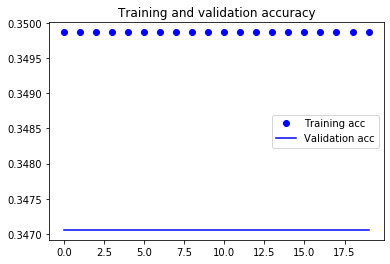

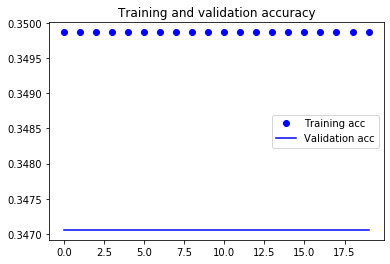

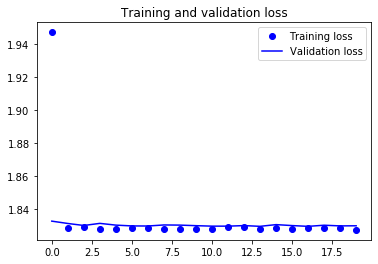

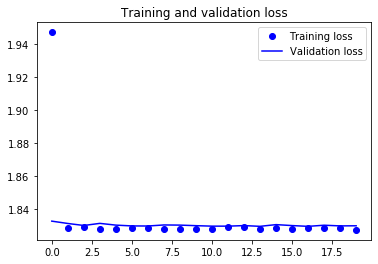

Training....Training....

Train on 17780 samples, validate on 5927 samplesTrain on 17780 samples, validate on 5927 samples

Epoch 1/16
Epoch 1/16


 7296/17780 [===========>..................] - ETA: 11:25 - loss: 1.6092 - acc: 0.1484 - ETA: 11:25 - loss: 1.6092 - acc: 0.1  256/17780 [..............................]  256/17780 [..............................] - ETA: 10:51 - loss: 1.5970 - acc: 0.  384/17780 [..............................]  384/17780 [..............................] - ETA: 10:26 - loss: 1.5582 - acc: 0.3281 - ETA: 10:26 - loss: 1.5582 - acc: 0.3  512/17780 [..............................]  512/17780 [..............................] - ETA: 10:22 - loss: 1.5496 - acc: 0.3  640/17780 [>.............................]  640/17780 [>.............................] - ETA: 10:38 - loss: 1.5423 - acc: 0.3  768/17780 [>.............................]  768/17780 [>.............................] - ETA: 10:29 - loss: 1.5400 - acc: 0.  896/17780 [>.............................]  896/17780 [>.............................] - ETA: 10:26 - loss: 1.5318 - acc: 0.3694 - ETA: 10:26 - loss: 1.5318 - acc: 0. 1024/17780 [>..................

17780/17780 [==============================]ETA: 2:12 - loss: 1.3549 - acc: 0.46615104/17780 [========================>.....]15104/17780 [========================>.....] - ETA: 2:06 - loss: 1.3530 - acc: 0.4615232/17780 [========================>.....]15232/17780 [========================>.....] - ETA: 2:00 - loss: 1.3508 - acc: 0.4686 - ETA: 2:00 - loss: 1.3508 - acc: 0.4615360/17780 [========================>.....]15360/17780 [========================>.....] - ETA: 1:54 - loss: 1.3481 - acc: 0.4697 - ETA: 1:54 - loss: 1.3481 - acc: 0.4615488/17780 [=========================>....]15488/17780 [=========================>....] - ETA: 1:48 - loss: 1.3462 - acc: 0.4706 - ETA: 1:48 - loss: 1.3462 - acc: 0.47015616/17780 [=========================>....] - ETA: 1:42 - loss: 1.3430 - acc: 0.4721 - ETA: 1:42 - loss: 1.3430 - acc: 0.47215744/17780 [=========================>....]15744/17780 [=========================>....] - ETA: 1:36 - loss: 1.3403 - acc: 0.47315872/17780 [=====================

In [17]:
a_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

modelg = models.Sequential()
modelg.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                        input_shape=(64, 64, 1)))
modelg.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
modelg.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
modelg.add(layers.MaxPooling2D(pool_size=(2, 2)))

modelg.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
modelg.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
modelg.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
modelg.add(layers.MaxPooling2D(pool_size=(2, 2)))

modelg.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelg.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelg.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelg.add(layers.MaxPooling2D(pool_size=(2, 2)))

modelg.add(layers.Flatten())  # this converts our 3D feature maps to 1D feature vectors
modelg.add(layers.Dense(64, activation='relu'))
modelg.add(layers.Dense(64, activation='relu'))
modelg.add(layers.Dense(2, activation='softmax'))

# optimizer:
modelg.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print ('Training....')


#fit
nb_epoch = 16
batch_size = 128

modelB = modelg.fit(X_train, r_train, epochs=nb_epoch, batch_size=batch_size,
          validation_data=(X_test, r_test), shuffle=True, verbose=1)

In [ ]:
modelg.save('race_1')

In [20]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

modela = models.Sequential()
modela.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                        input_shape=(64, 64, 1)))
modela.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
modela.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
modela.add(layers.MaxPooling2D(pool_size=(2, 2)))

modela.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
modela.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
modela.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
modela.add(layers.MaxPooling2D(pool_size=(2, 2)))

modela.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modela.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modela.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modela.add(layers.MaxPooling2D(pool_size=(2, 2)))

modela.add(layers.Flatten())  # this converts our 3D feature maps to 1D feature vectors
modela.add(layers.Dense(64, activation='relu'))
modela.add(layers.Dense(64, activation='relu'))
modela.add(layers.Dense(9, activation='softmax'))

# optimizer:
modela.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print ('Training....')


#fit
nb_epoch = 22
batch_size = 128

modelC = modela.fit(X_train, a_train, epochs=nb_epoch, batch_size=batch_size,
          validation_data=(X_test, a_test), shuffle=True, verbose=1)

Training....
Train on 17780 samples, validate on 5927 samples
Epoch 1/22
17780/17780 [==============================] - 1691s 95ms/sample - loss: 1.8012 - acc: 0.3394 - val_loss: 1.5915 - val_acc: 0.3965
Epoch 2/22
17780/17780 [==============================] - 2236s 126ms/sample - loss: 1.3760 - acc: 0.4453 - val_loss: 1.2380 - val_acc: 0.4889
Epoch 3/22
17780/17780 [==============================] - 2162s 122ms/sample - loss: 1.1818 - acc: 0.5038 - val_loss: 1.1364 - val_acc: 0.5210
Epoch 4/22
17780/17780 [==============================] - 2222s 125ms/sample - loss: 1.0823 - acc: 0.5413 - val_loss: 1.1252 - val_acc: 0.5217
Epoch 5/22
17780/17780 [==============================] - 2203s 124ms/sample - loss: 1.0102 - acc: 0.5665 - val_loss: 1.0558 - val_acc: 0.5438
Epoch 6/22
17780/17780 [==============================] - 2129s 120ms/sample - loss: 0.9517 - acc: 0.5969 - val_loss: 1.0715 - val_acc: 0.5394
Epoch 7/22
17780/17780 [==============================] - 2016s 113ms/sample - lo

KeyboardInterrupt: 

In [22]:
modela.save('age_2')